**Import Statements**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency

**Importing Dataset**

In [3]:
DataSetPath = '/content/DataSet.csv'
data = pd.read_csv(DataSetPath)

**Basis Overview**

1. Dataset Information

In [ ]:
dataInfo = data.info()
dataShape = data.shape

print("\nDataset Shape: ")
print(dataShape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

2. Sample Data

* Head



In [ ]:
dataHead = data.head()
dataHead

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


* Tail

In [ ]:
dataTail = data.tail()
dataTail

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1
11054,-1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


3. **Check for Missing Values**

In [ ]:
data.isnull().sum()

,0
having_IP_Address,0
URL_Length,0
Shortining_Service,0
having_At_Symbol,0
double_slash_redirecting,0
Prefix_Suffix,0
having_Sub_Domain,0
SSLfinal_State,0
Domain_registeration_length,0
Favicon,0


**Initial Data Exploration**

1. Statistical Summary of Dataset

In [ ]:
dataDesc = data.describe()
dataDesc

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


2. Distribution of Target Variable

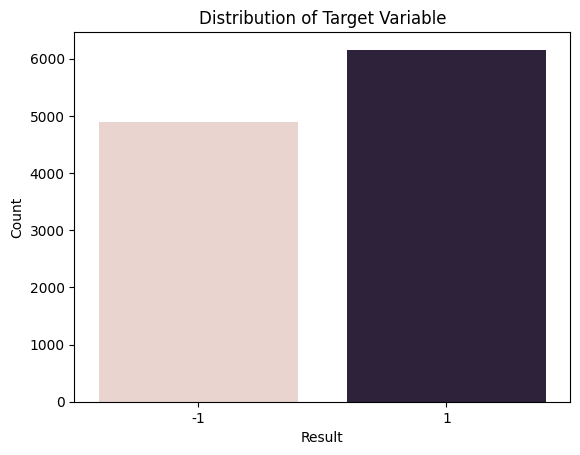

,proportion
Result,
1,55.694256
-1,44.305744


In [ ]:
# Visuilise Distribution
sns.countplot(x = data['Result'], hue=data['Result'], legend= False)
plt.title("Distribution of Target Variable")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()

# Distribution Percentage
resultCounts = data['Result'].value_counts(normalize = True) * 100
resultCounts

**Exploratory Data Analysis**

In [ ]:
featureList = ["having_IP_Address", "URL_Length", "Shortining_Service","having_At_Symbol", "double_slash_redirecting", "Prefix_Suffix", "having_Sub_Domain", "SSLfinal_State", "Domain_registeration_length", "Favicon", "port", "HTTPS_token", "Request_URL","URL_of_Anchor", "Links_in_tags", "SFH", "Submitting_to_email","Abnormal_URL", "Redirect", "on_mouseover", "RightClick", "popUpWidnow", "Iframe", "DNSRecord","web_traffic","Links_pointing_to_page", "Google_Index", "Page_Rank", "age_of_domain", "Statistical_report"]

1. Distributions

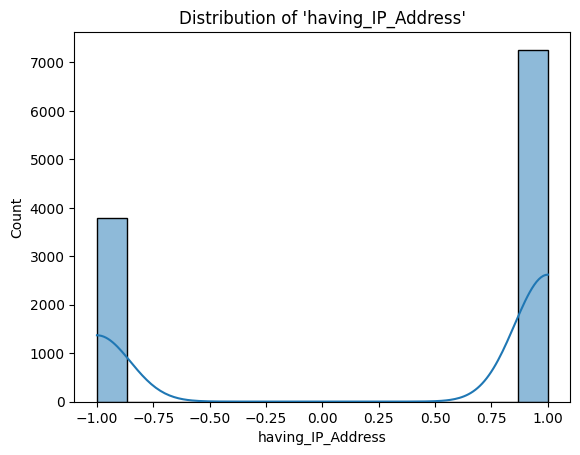

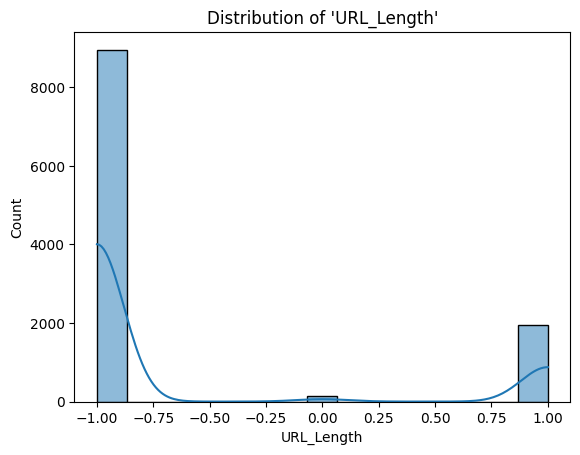

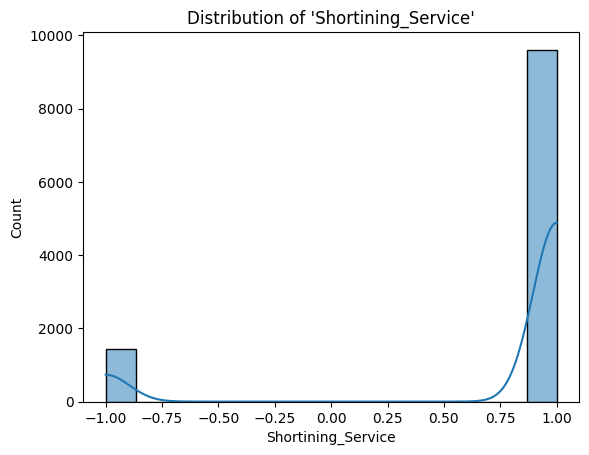

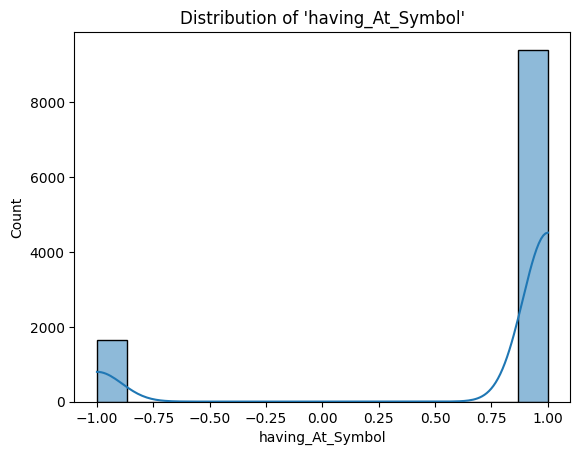

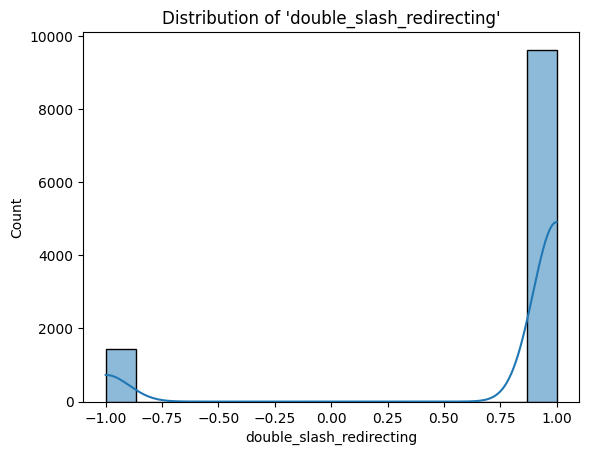

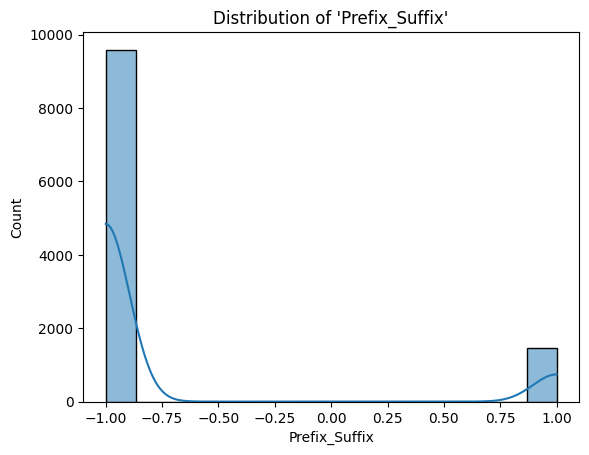

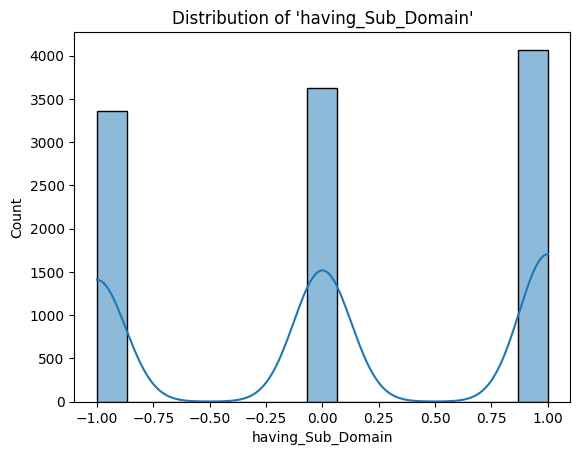

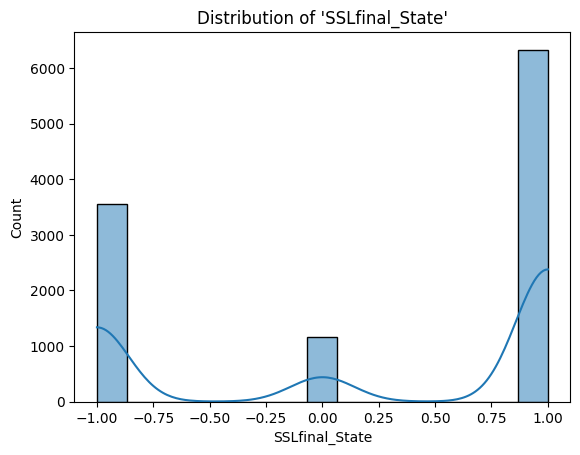

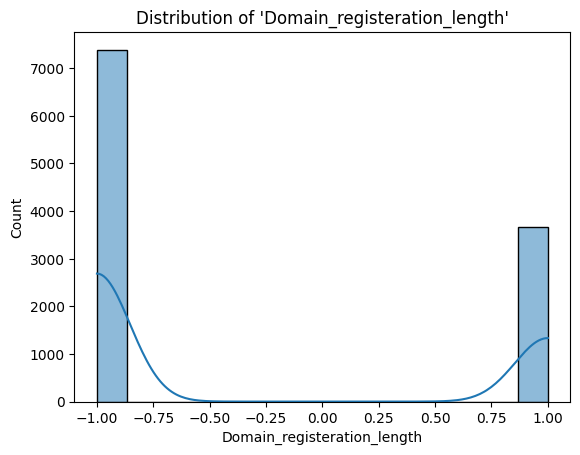

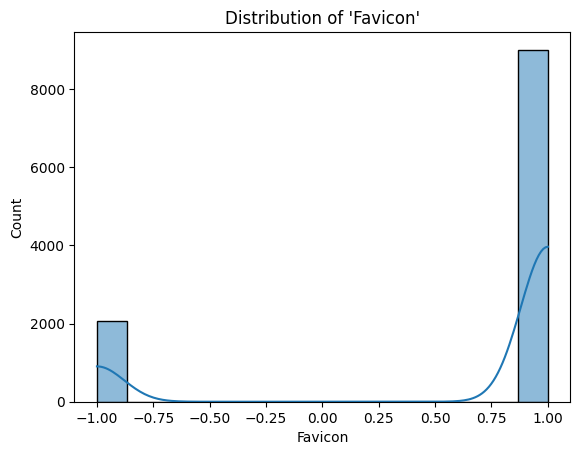

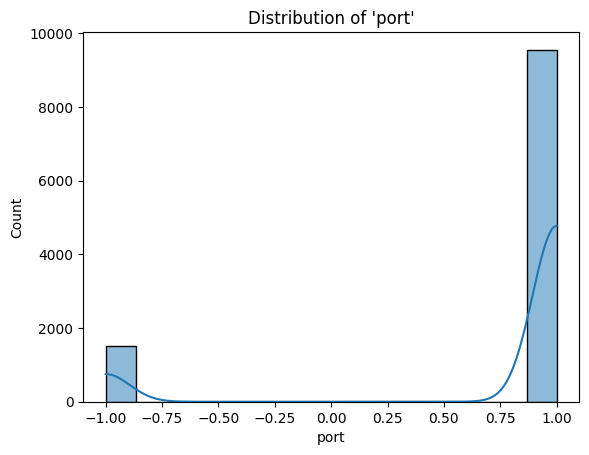

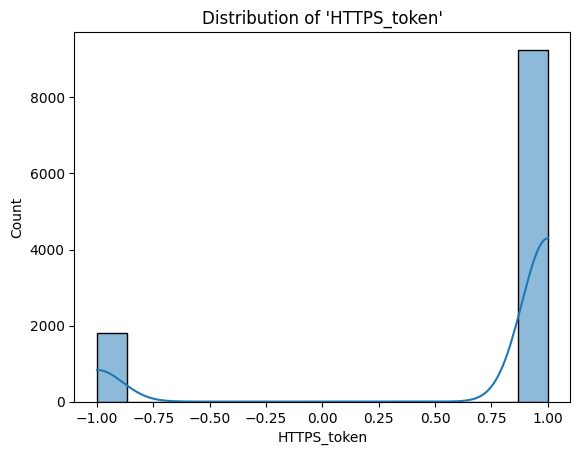

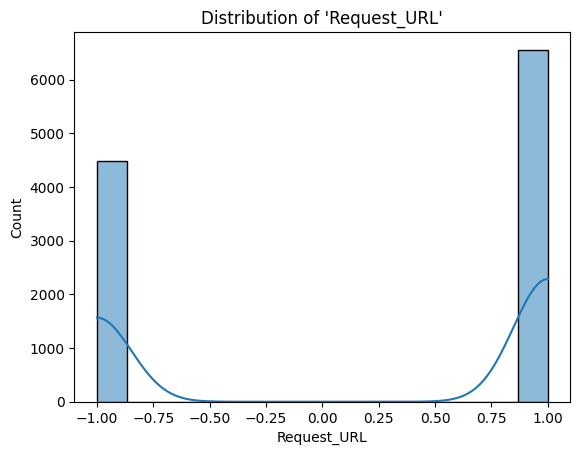

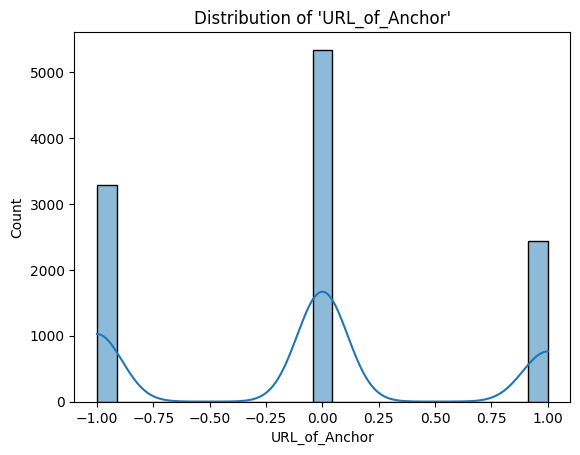

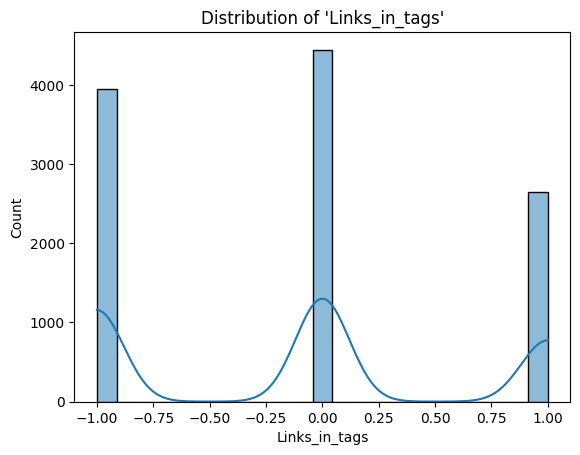

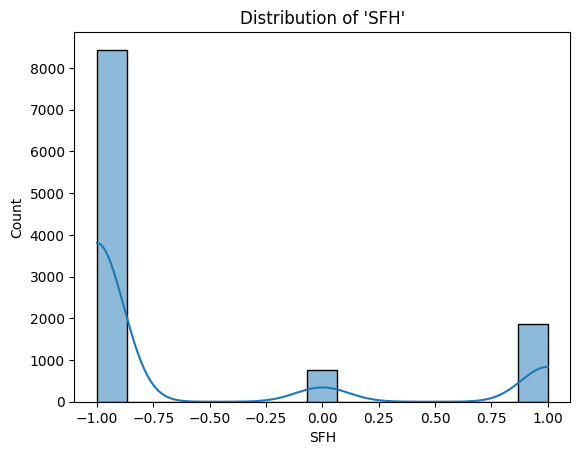

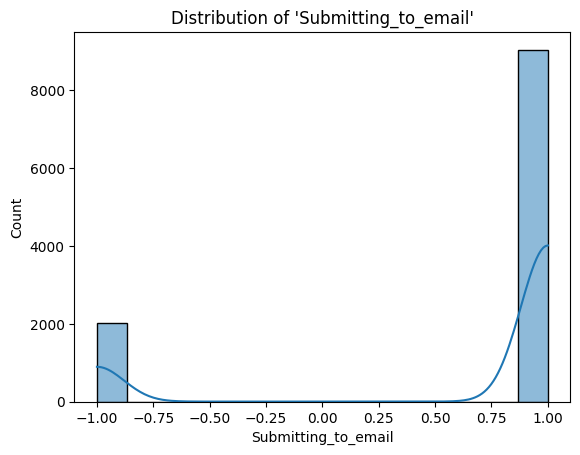

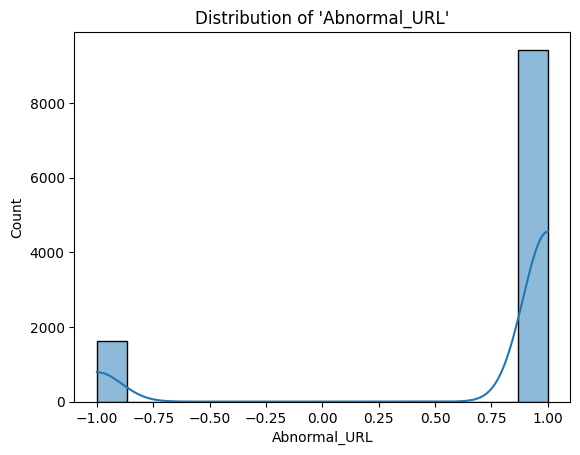

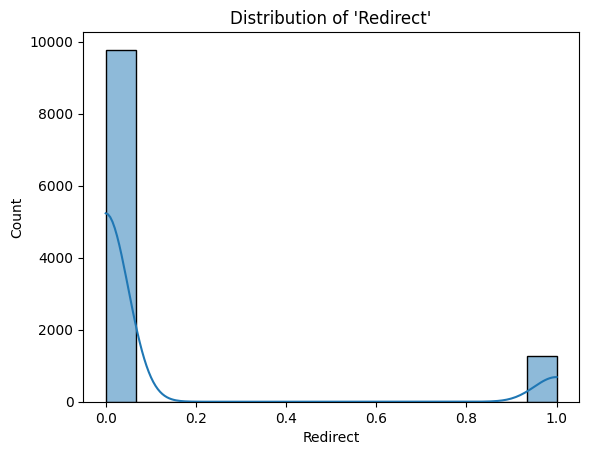

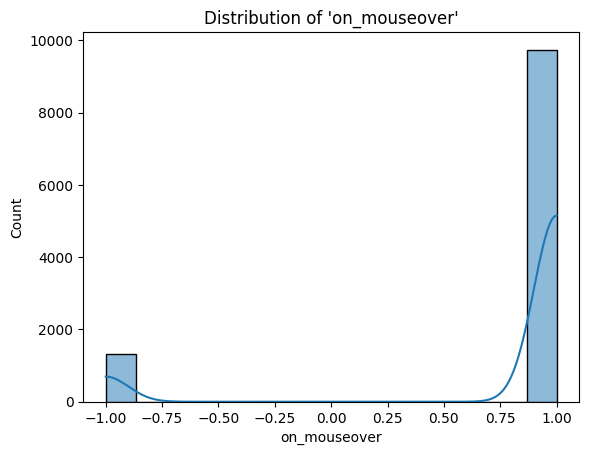

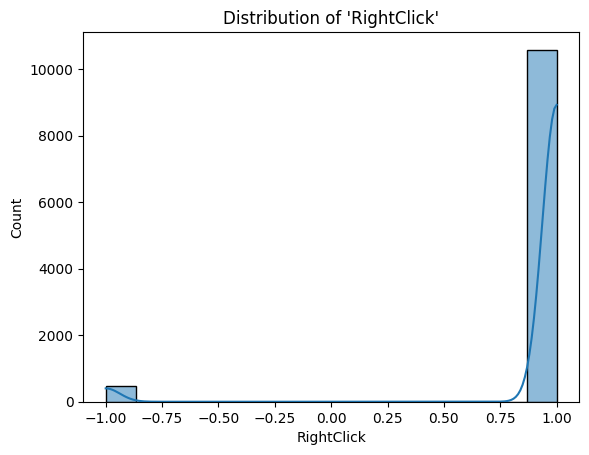

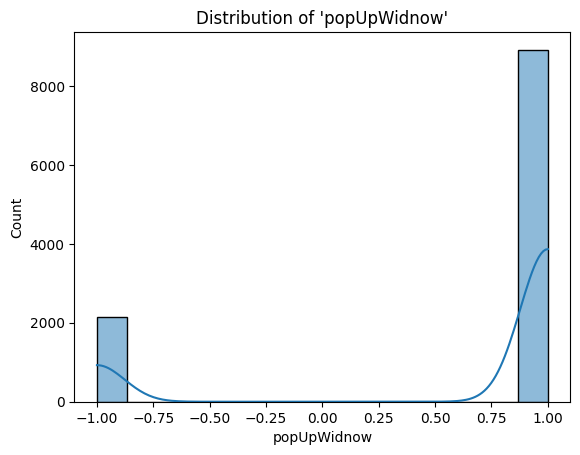

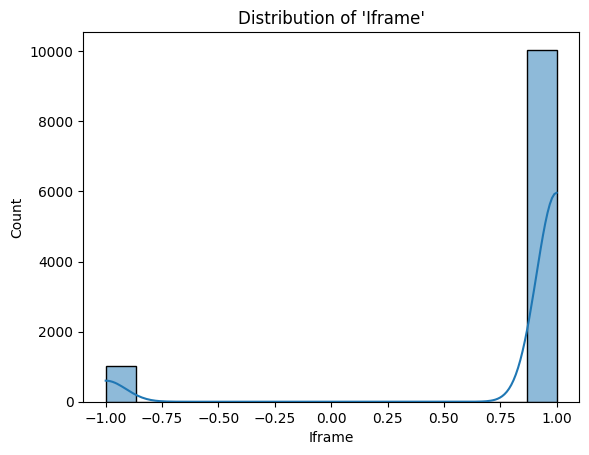

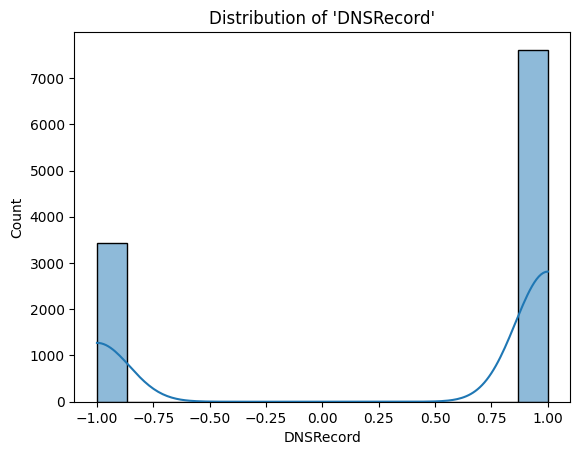

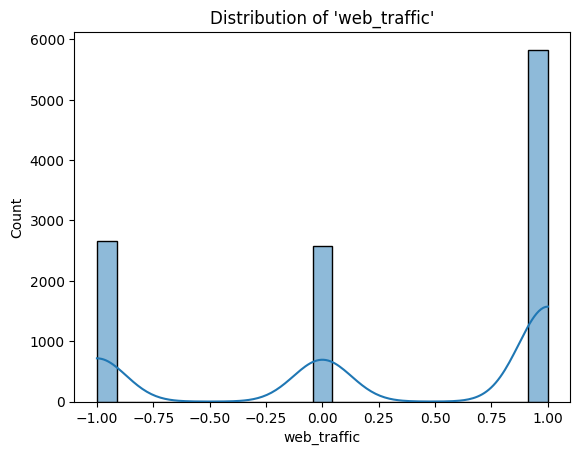

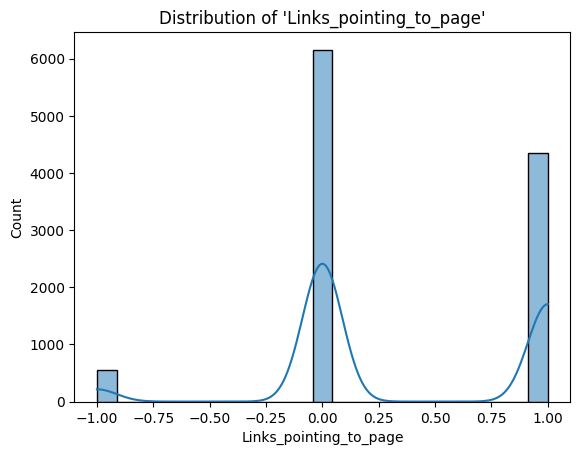

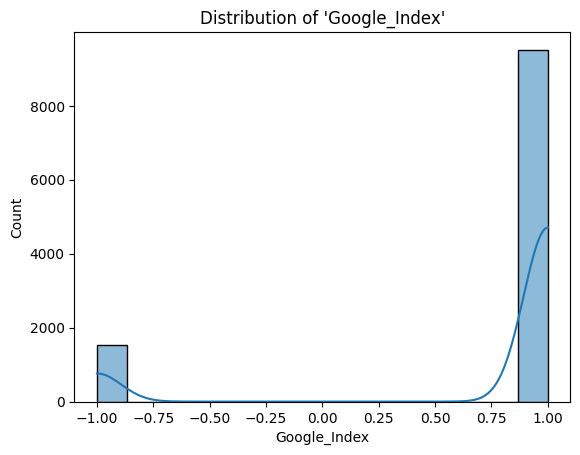

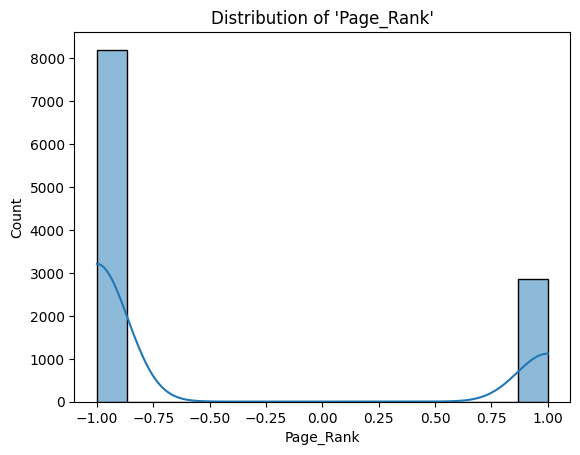

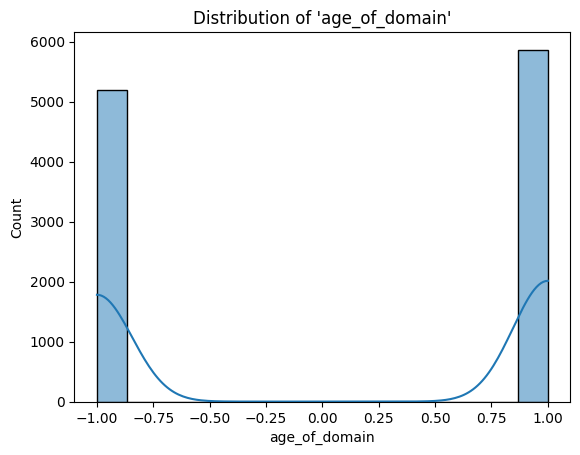

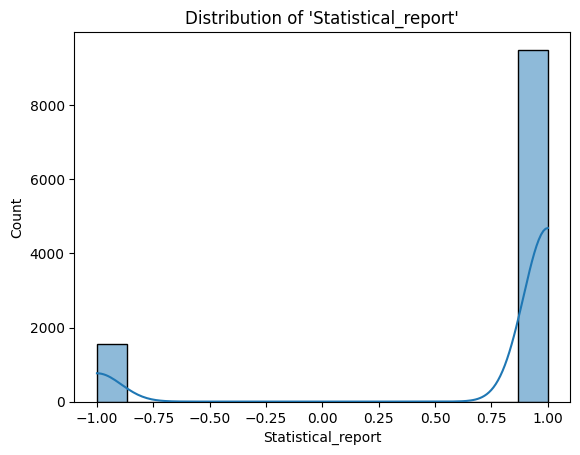

In [ ]:
for feature in featureList:
  sns.histplot(data[feature], kde = True)
  plt.title(f"Distribution of '{feature}'")
  plt.xlabel(f"{feature}")
  plt.ylabel("Count")
  plt.show()
  print("\n")

2. Chi-Square Test for Features

In [ ]:
y = data["Result"]
testResult = []
for feature in featureList:
  x = data[feature]
  contengencyTable = pd.crosstab(x, y)
  chi2, p, dof, expected = chi2_contingency(contengencyTable)
  testResult.append([feature, chi2, p])

testResult = pd.DataFrame(testResult, columns = ["Feature", "Chi-Square Statistic", "P-Value"])
print(testResult)

                        Feature  Chi-Square Statistic        P-Value
0             having_IP_Address             97.616128   5.078857e-23
1                    URL_Length             57.774681   2.846999e-13
2            Shortining_Service             50.661841   1.097324e-12
3              having_At_Symbol             30.694313   3.020491e-08
4      double_slash_redirecting             16.247156   5.559299e-05
5                 Prefix_Suffix           1341.399192  1.139474e-293
6             having_Sub_Domain           1595.294123   0.000000e+00
7                SSLfinal_State           6686.246056   0.000000e+00
8   Domain_registeration_length            562.628588  2.253279e-124
9                       Favicon              0.000023   9.961924e-01
10                         port             14.449423   1.439740e-04
11                  HTTPS_token             17.342195   3.121778e-05
12                  Request_URL            708.665429  3.902709e-156
13                URL_of_Anchor   

3. Correlation Heatmap

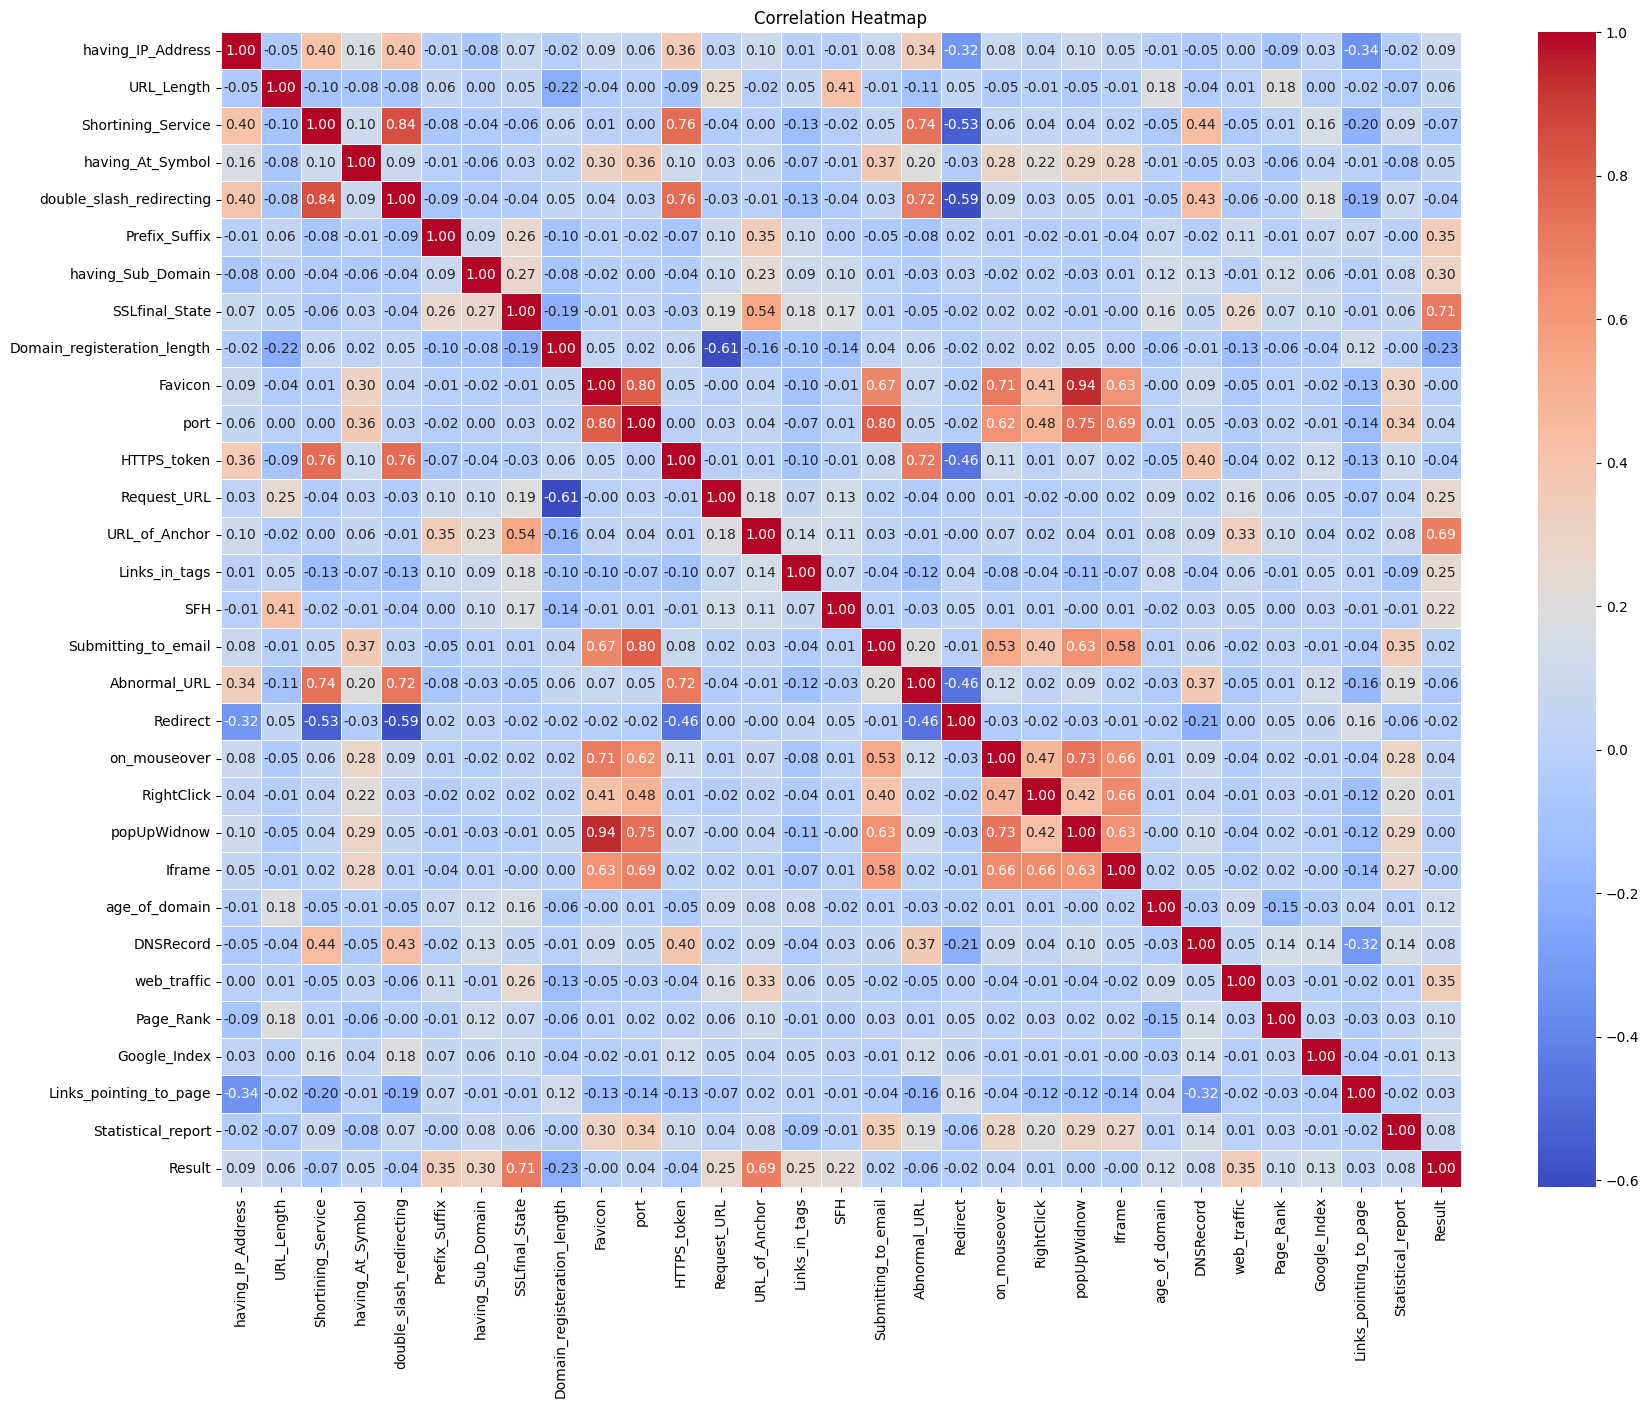

In [ ]:
corrMat  = data.corr()
plt.figure(figsize = (20,15))
sns.heatmap(corrMat, annot = True, cmap = "coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


**Model Training**

Preperation

In [11]:
# Import statements to prepare dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings("ignore")

# Sperating Results
X = data.drop("Result", axis = 1)
y = data["Result"]

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Store Results
resultsSimple = []

1. Gaussian Navie Bayes

Accuracy:  58.30%
              precision    recall  f1-score   support

          -1       0.51      1.00      0.67       956
           1       1.00      0.27      0.42      1255

    accuracy                           0.58      2211
   macro avg       0.75      0.63      0.55      2211
weighted avg       0.79      0.58      0.53      2211



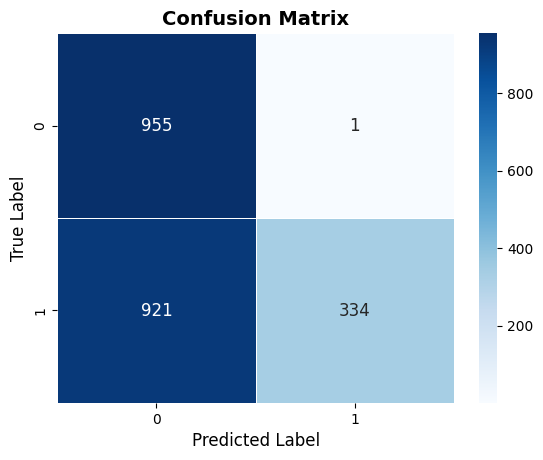

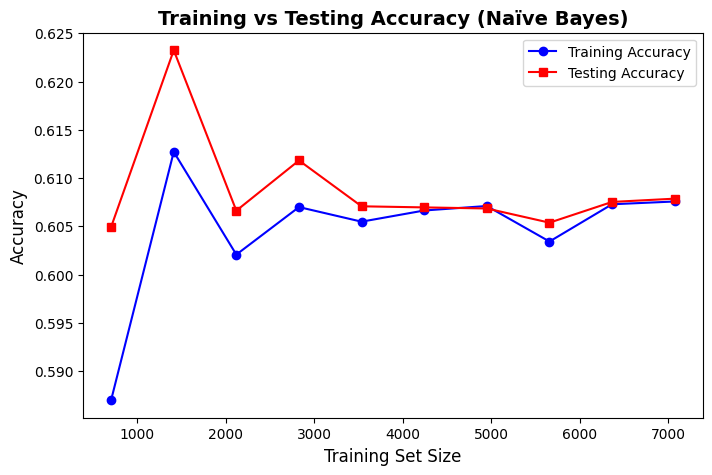

In [12]:
# Import Statements
from sklearn.naive_bayes import GaussianNB

# Training
GNB = GaussianNB()
history = GNB.fit(X_train, y_train)

# Prediction
yPred = GNB.predict(X_test)
accuracy = accuracy_score(y_test, yPred)

# Results
print(f"Accuracy: {accuracy * 100 : .2f}%")
print(classification_report(y_test, yPred))

# Store results
resultsSimple.append(["Gaussian Naive Bayes", accuracy * 100])

# Visuilised Results
cm = confusion_matrix(y_test, yPred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, annot_kws={"size": 12})
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14, fontweight="bold")

plt.show()

print("\n")

# Training vs. Testing Accuracy Plot
train_sizes, train_scores, test_scores = learning_curve(
    GNB, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o', color='blue')
plt.plot(train_sizes, test_mean, label="Testing Accuracy", marker='s', color='red')

plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training vs Testing Accuracy (Naïve Bayes)", fontsize=14, fontweight="bold")
plt.legend()

plt.show()

2. Decision Tree

Accuracy:  95.93%
              precision    recall  f1-score   support

          -1       0.96      0.95      0.95       956
           1       0.96      0.97      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



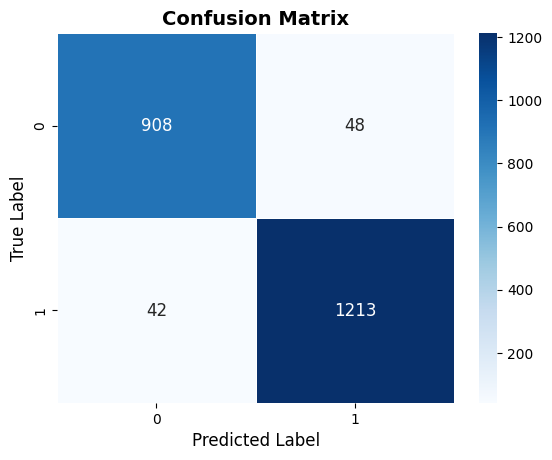

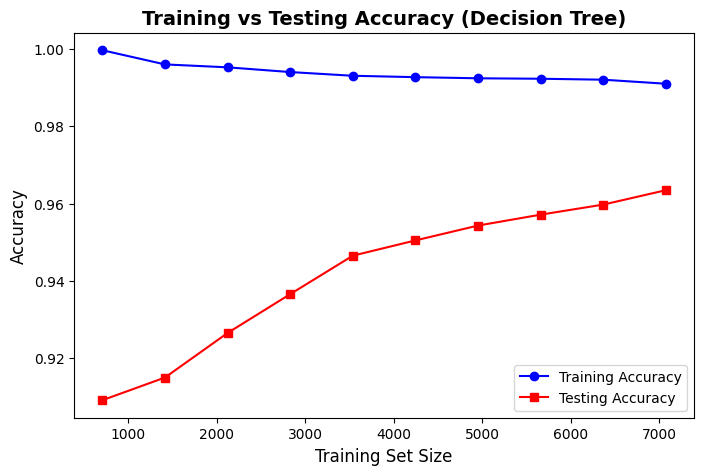

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Train Model
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

# Predict
yPred = DT.predict(X_test)
accuracy = accuracy_score(y_test, yPred)

# Results
print(f"Accuracy: {accuracy * 100 : .2f}%")
print(classification_report(y_test, yPred))

# Store Results
resultsSimple.append(["Decision Tree", accuracy * 100])

# Visuilize Results
cm = confusion_matrix(y_test, yPred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, annot_kws={"size": 12})
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14, fontweight="bold")

plt.show()

print("\n")

# Training vs. Testing Accuracy Plot
train_sizes, train_scores, test_scores = learning_curve(
    DT, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o', color='blue')
plt.plot(train_sizes, test_mean, label="Testing Accuracy", marker='s', color='red')

plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training vs Testing Accuracy (Decision Tree)", fontsize=14, fontweight="bold")
plt.legend()

plt.show()


3. Logistic Regression

Accuracy:  92.45%
              precision    recall  f1-score   support

          -1       0.92      0.90      0.91       956
           1       0.93      0.94      0.93      1255

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



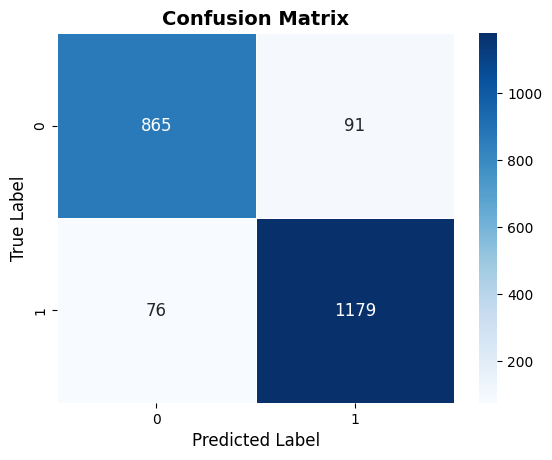

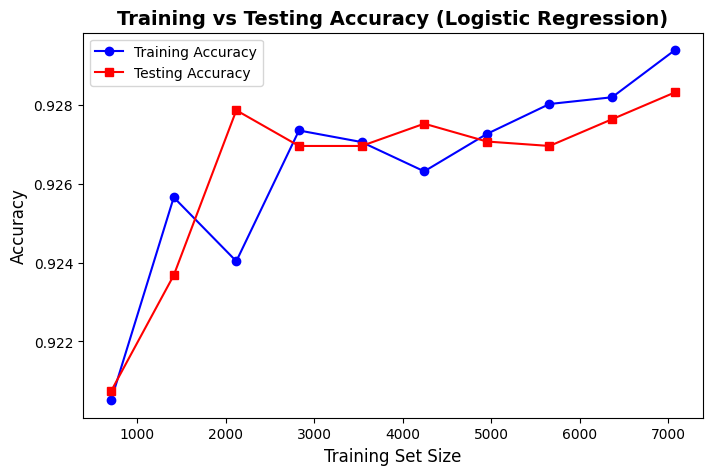

In [14]:
from sklearn.linear_model import LogisticRegression

# Train Model
LR = LogisticRegression()
LR.fit(X_train, y_train)

# Predict
yPred = LR.predict(X_test)
accuracy = accuracy_score(y_test, yPred)

# Results
print(f"Accuracy: {accuracy * 100 : .2f}%")
print(classification_report(y_test, yPred))

# Store results
resultsSimple.append(["Logistic Regression", accuracy * 100])

# Visuilize Results
cm = confusion_matrix(y_test, yPred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, annot_kws={"size": 12})
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14, fontweight="bold")

plt.show()

print("\n")

# Training vs. Testing Accuracy Plot
train_sizes, train_scores, test_scores = learning_curve(
    LR, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o', color='blue')
plt.plot(train_sizes, test_mean, label="Testing Accuracy", marker='s', color='red')

plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training vs Testing Accuracy (Logistic Regression)", fontsize=14, fontweight="bold")
plt.legend()

plt.show()



4. Support Vector Machine (SVM)

Accuracy:  94.71%
              precision    recall  f1-score   support

          -1       0.95      0.92      0.94       956
           1       0.94      0.97      0.95      1255

    accuracy                           0.95      2211
   macro avg       0.95      0.94      0.95      2211
weighted avg       0.95      0.95      0.95      2211



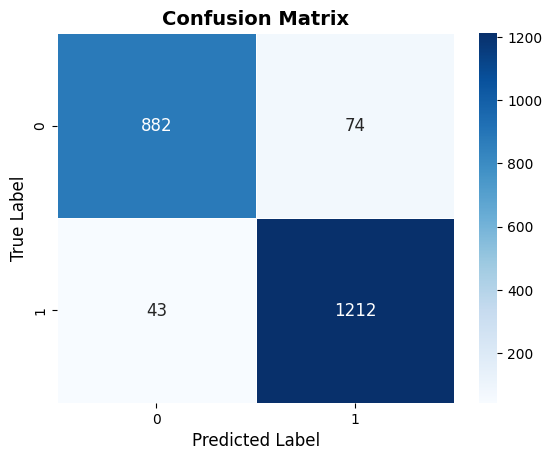

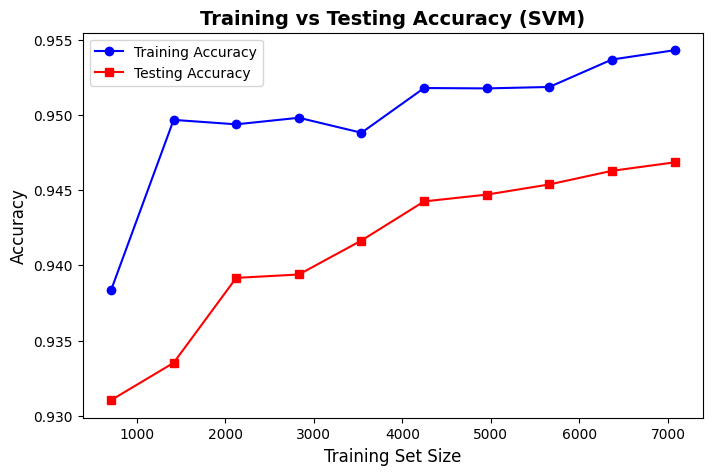

In [15]:
from sklearn.svm import SVC

# Train Model
SVM = SVC()
SVM.fit(X_train, y_train)

# Predict
yPred = SVM.predict(X_test)
accuracy = accuracy_score(y_test, yPred)

# Results
print(f"Accuracy: {accuracy * 100 : .2f}%")
print(classification_report(y_test, yPred))

# Store Results
resultsSimple.append(["Support Vector Machine", accuracy * 100])

# visuilise
cm = confusion_matrix(y_test, yPred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, annot_kws={"size": 12})
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14, fontweight="bold")

plt.show()

print("\n")

# Training vs. Testing Accuracy Plot
train_sizes, train_scores, test_scores = learning_curve(
    SVM, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o', color='blue')
plt.plot(train_sizes, test_mean, label="Testing Accuracy", marker='s', color='red')

plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training vs Testing Accuracy (SVM)", fontsize=14, fontweight="bold")
plt.legend()

plt.show()




5. Random Forest

Accuracy:  96.56%
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.97      0.97      0.97      2211



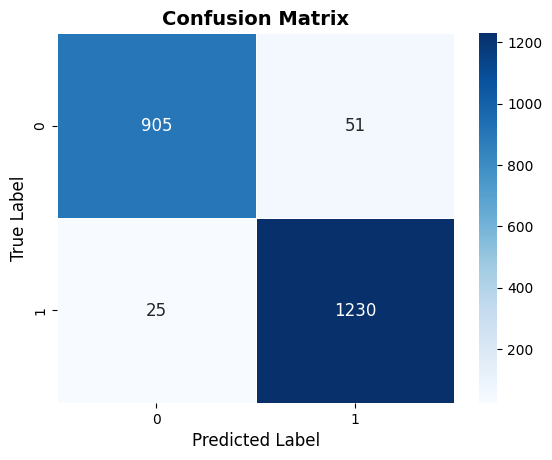

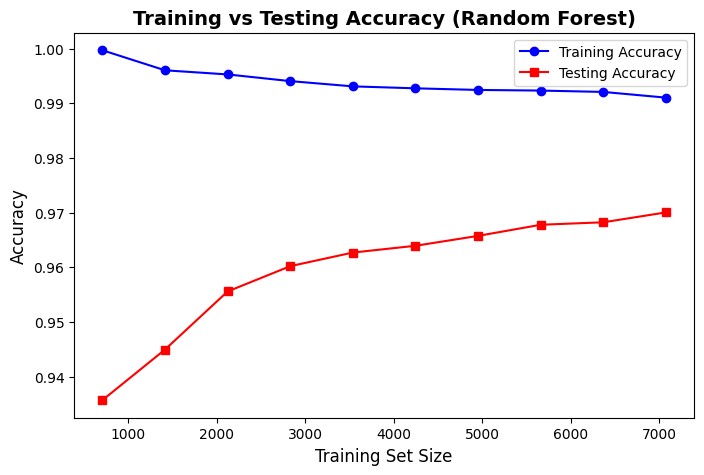

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Train Model
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

# Predict
yPred = RF.predict(X_test)
accuracy = accuracy_score(y_test, yPred)

# Results
print(f"Accuracy: {accuracy * 100 : .2f}%")
print(classification_report(y_test, yPred))

# Store Results
resultsSimple.append(["Random Forest", accuracy * 100])

# Visuilise
cm = confusion_matrix(y_test, yPred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, annot_kws={"size": 12})
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14, fontweight="bold")

plt.show()

print("\n")

# Training vs. Testing Accuracy Plot
train_sizes, train_scores, test_scores = learning_curve(
    RF, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o', color='blue')
plt.plot(train_sizes, test_mean, label="Testing Accuracy", marker='s', color='red')

plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training vs Testing Accuracy (Random Forest)", fontsize=14, fontweight="bold")
plt.legend()

plt.show()



6. K-Nearest Neighbors

Accuracy:  94.08%
              precision    recall  f1-score   support

          -1       0.94      0.92      0.93       956
           1       0.94      0.95      0.95      1255

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



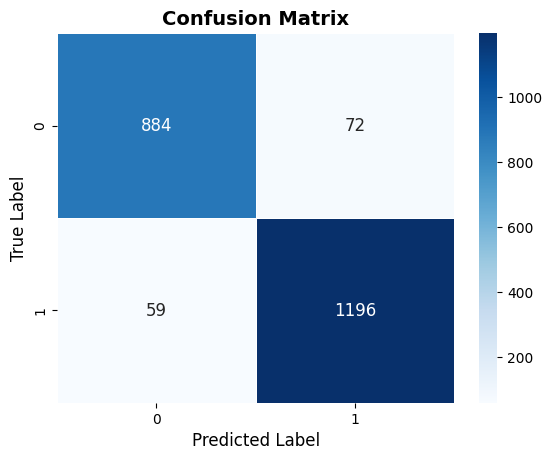

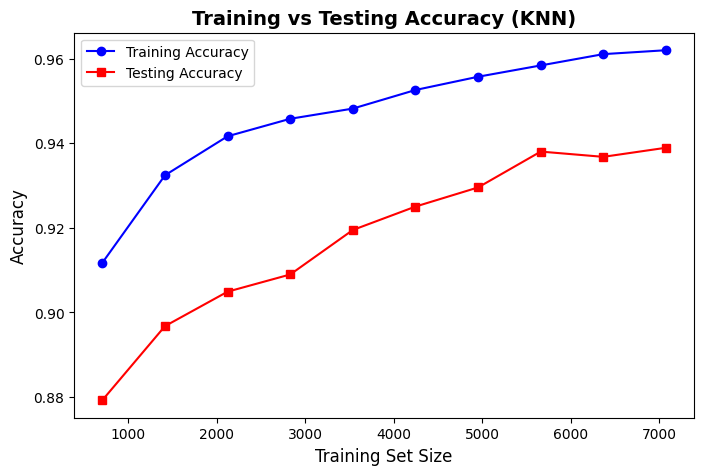

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Train Model
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

# Predict
yPred = KNN.predict(X_test)
accuracy = accuracy_score(y_test, yPred)

# Results
print(f"Accuracy: {accuracy * 100 : .2f}%")
print(classification_report(y_test, yPred))

# Store Results
resultsSimple.append(["K-Nearest Neighbors", accuracy * 100])

# Visuilise
cm = confusion_matrix(y_test, yPred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, annot_kws={"size": 12})
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14, fontweight="bold")

plt.show()

print("\n")

# Training vs. Testing Accuracy Plot
train_sizes, train_scores, test_scores = learning_curve(
    KNN, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o', color='blue')
plt.plot(train_sizes, test_mean, label="Testing Accuracy", marker='s', color='red')

plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training vs Testing Accuracy (KNN)", fontsize=14, fontweight="bold")
plt.legend()

plt.show()


**Comparing Model Performance**

In [19]:
resultsSimple = pd.DataFrame(resultsSimple, columns = ["Model", "Accuracy"])
resultsSimple.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
4,Random Forest,96.562641
1,Decision Tree,95.929444
3,Support Vector Machine,94.708277
5,K-Nearest Neighbors,94.075079
2,Logistic Regression,92.446857
0,Gaussian Naive Bayes,58.299412


**Validation**

In [20]:
resultsAfterValidation = []

1. K-Fold Cross Validation for Logistic Regression & KNN

In [21]:
from sklearn.model_selection import cross_val_score, KFold

# Logistic Regression
LR = LogisticRegression()
kfold = KFold(n_splits = 15, shuffle = True, random_state = 52)
scores = cross_val_score(LR, X, y, cv = kfold)

score = scores.mean()
resultsAfterValidation.append(["Logistic Regression","K-Fold Cross Validation", score * 100])

# KNN
KNN = KNeighborsClassifier()
kfold = KFold(n_splits = 15, shuffle = True, random_state = 52)
scores = cross_val_score(KNN, X, y, cv = kfold)

score = scores.mean()
resultsAfterValidation.append(["K-Nearest Neighbors","K-Fold Cross Validation", score * 100])

# Gaussian Navie Bayes
GNB = GaussianNB()
kfold = KFold(n_splits = 15, shuffle = True, random_state = 52)
scores = cross_val_score(GNB, X, y, cv = kfold)

score = scores.mean()
resultsAfterValidation.append(["Gaussian Naive Bayes","K-Fold Cross Validation", score * 100])

2. Stratified K-fold for SVM

In [22]:
from sklearn.model_selection import StratifiedKFold

# SVM
SVM = SVC()
skfold = StratifiedKFold(n_splits = 15, shuffle = True, random_state = 52)
scores = cross_val_score(SVM, X, y, cv = skfold)

score = scores.mean()
resultsAfterValidation.append(["Support Vector Machine","Stratified K-Fold", score * 100])


3. Nested Cross Validation for Random Forest

In [23]:
from sklearn.model_selection import GridSearchCV

# Random Forest
RF = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(estimator = RF, param_grid = param_grid, cv = 5, scoring="accuracy", n_jobs = -1)
nested_cv_scores = cross_val_score(grid_search, X = X, y = y, cv = 5)


score = nested_cv_scores.mean()
resultsAfterValidation.append(["Random Forest","Nested Cross Validation", score * 100])


4. Grid Search for Decision Tree

In [24]:
from sklearn.model_selection import GridSearchCV
DT_Params = {'max_depth': [5, 10, 20, None],
             'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(estimator = DT, param_grid = DT_Params, cv = 5, scoring = "accuracy", n_jobs = -1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

resultsAfterValidation.append(["Decision Tree","Grid Search", best_score * 100])



Best Parameters: {'max_depth': None, 'min_samples_split': 2}
Best Score: 0.9637041532271471


5. Random Search for Random Forest

In [25]:
from sklearn.model_selection import RandomizedSearchCV

RF_Params = {'n_estimators': [50, 100, 200, 300], 'max_depth': [10,20,None]}
RF_RandomSearch = RandomizedSearchCV(estimator = RF, param_distributions = RF_Params, n_iter = 10, cv = 5, scoring = "accuracy", n_jobs = -1)
RF_RandomSearch.fit(X_train, y_train)

best_params = RF_RandomSearch.best_params_
best_score = RF_RandomSearch.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

resultsAfterValidation.append(["Random Forest","Random Search", best_score * 100])

Best Parameters: {'n_estimators': 200, 'max_depth': None}
Best Score: 0.9708273329769357


Results after Evaluation

In [26]:
resultsAfterValidation = pd.DataFrame(resultsAfterValidation, columns = ["Model", "Method", "Accuracy"])
resultsAfterValidation

,Model,Method,Accuracy
0,Logistic Regression,K-Fold Cross Validation,92.781547
1,K-Nearest Neighbors,K-Fold Cross Validation,94.907282
2,Gaussian Naive Bayes,K-Fold Cross Validation,60.425147
3,Support Vector Machine,Stratified K-Fold,94.898236
4,Random Forest,Nested Cross Validation,96.942560
5,Decision Tree,Grid Search,96.370415
6,Random Forest,Random Search,97.082733


Compare without Evaluation

In [28]:
resultsSimple.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
4,Random Forest,96.562641
1,Decision Tree,95.929444
3,Support Vector Machine,94.708277
5,K-Nearest Neighbors,94.075079
2,Logistic Regression,92.446857
0,Gaussian Naive Bayes,58.299412


In [27]:
resultsAfterValidation.sort_values(by = "Accuracy", ascending = False)

,Model,Method,Accuracy
6,Random Forest,Random Search,97.082733
4,Random Forest,Nested Cross Validation,96.942560
5,Decision Tree,Grid Search,96.370415
1,K-Nearest Neighbors,K-Fold Cross Validation,94.907282
3,Support Vector Machine,Stratified K-Fold,94.898236
0,Logistic Regression,K-Fold Cross Validation,92.781547
2,Gaussian Naive Bayes,K-Fold Cross Validation,60.425147
